In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv("auto-mpg.csv")  

In [3]:
car_df.shape

(398, 9)

In [4]:
car_df.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
#dropping/ignoring car_name 
car_df = car_df.drop('car name', axis=1) # axis=1 means column

In [6]:
car_df=car_df.drop('yr',axis=1)

In [7]:
car_df.head(2)

,mpg,cyl,disp,hp,wt,acc,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1


In [8]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.head()

,mpg,cyl,disp,hp,wt,acc,origin
0,18.0,8,307.0,130,3504,12.0,america
1,15.0,8,350.0,165,3693,11.5,america
2,18.0,8,318.0,150,3436,11.0,america
3,16.0,8,304.0,150,3433,12.0,america
4,17.0,8,302.0,140,3449,10.5,america


In [9]:
car_df = pd.get_dummies(car_df, columns=['origin'])
car_df.head()

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,1,0,0
1,15.0,8,350.0,165,3693,11.5,1,0,0
2,18.0,8,318.0,150,3436,11.0,1,0,0
3,16.0,8,304.0,150,3433,12.0,1,0,0
4,17.0,8,302.0,140,3449,10.5,1,0,0


In [10]:
#A quick summary of the data columns
car_df.describe()

,mpg,cyl,disp,wt,acc,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,1.000000,1.000000,1.000000


In [11]:
car_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [12]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,1,0,0
126,21.0,6,200.0,?,2875,17.0,1,0,0
330,40.9,4,85.0,?,1835,17.3,0,0,1
336,23.6,4,140.0,?,2905,14.3,1,0,0
354,34.5,4,100.0,?,2320,15.8,0,0,1
374,23.0,4,151.0,?,3035,20.5,1,0,0


In [13]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,1,0,0


In [14]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [15]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['hp'] = car_df['hp'].astype('float64')  # converting the hp column from object / string type to float


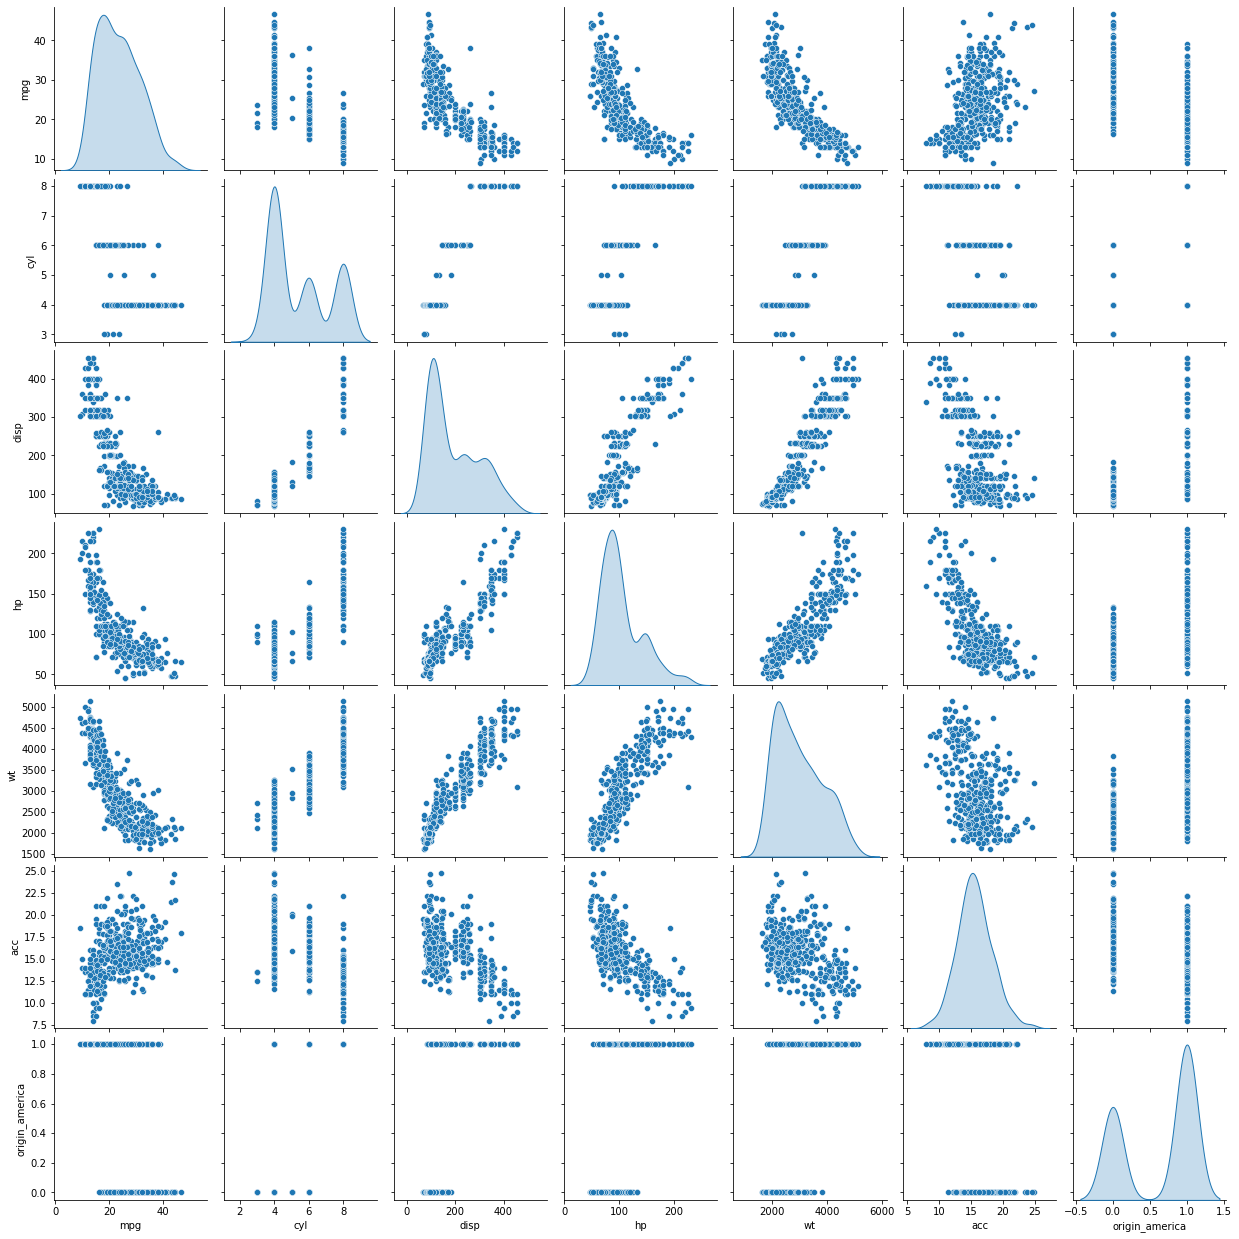

In [16]:
car_df_attr = car_df.iloc[:, 0:7]
sns.pairplot(car_df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the dia

### Linear regression Model

In [17]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [18]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [19]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [20]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cyl is -0.5385175619522522
The coefficient for disp is 0.009552745274875927
The coefficient for hp is -0.05727699079305885
The coefficient for wt is -0.005060766643316699
The coefficient for acc is -0.04984260331460762
The coefficient for origin_america is -1.0725834448504468
The coefficient for origin_asia is 1.1567451175283285
The coefficient for origin_europe is -0.08416167267788158


In [21]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 46.76618365089037


In [22]:
reg_model.score(X_train, y_train)

0.6946279278265037

In [23]:
#out of sample score (R^2)
reg_model.score(X_test, y_test)

0.7725116212499805

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7780567515578429


In [25]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.7815686088758094


### DecisionTreeRegressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9997388230765725
0.626055065590484


In [28]:
model2_reg=DecisionTreeRegressor(max_depth=2,criterion='squared_error')
model2_reg.fit(X_train,y_train)
print(model2_reg.score(X_train,y_train))
print(model2_reg.score(X_test,y_test))

0.7181699676151783
0.7222023731005149


### BaggingRegressor

In [29]:
from sklearn.ensemble import BaggingRegressor

In [30]:
model_bag=BaggingRegressor()
model_bag.fit(X_train,y_train)
print(model_bag.score(X_train,y_train))
print(model_bag.score(X_test,y_test))

0.949043685767492
0.781718358508291


In [31]:
model_bag=BaggingRegressor(n_estimators=14,max_features=1)
model_bag.fit(X_train,y_train)
print(model_bag.score(X_train,y_train))
print(model_bag.score(X_test,y_test))

0.7881884528142591
0.7502300385204178


# BoostingRegressor

#### > AdaBoostRegressor

In [32]:
from sklearn.ensemble import AdaBoostRegressor

In [33]:
model_boost=AdaBoostRegressor(learning_rate=0.3)
model_boost.fit(X_train,y_train)
print(model_boost.score(X_train,y_train))
print(model_boost.score(X_test,y_test))

0.8005489457741144
0.774625443406029


#### GradientBoostingRegressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
model_Gboost=GradientBoostingRegressor()
model_Gboost.fit(X_train,y_train)
print(model_Gboost.score(X_train,y_train))
print(model_Gboost.score(X_test,y_test))

0.9453868477803468
0.7824336161054487


In [36]:
model_Gboost=GradientBoostingRegressor(max_depth=3,learning_rate=0.3,n_estimators=5)
model_Gboost.fit(X_train,y_train)
print(model_Gboost.score(X_train,y_train))
print(model_Gboost.score(X_test,y_test))

0.7920473417597338
0.7612070123128183


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model_rf=RandomForestRegressor(max_depth=3,min_samples_split=3)
model_rf.fit(X_train,y_train)
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))

0.7955765114044344
0.7909456598317939


### SVM

In [39]:
from sklearn.svm import SVR

In [40]:
model_svm=SVR(kernel='rbf',C=1.0,gamma='scale')
model_svm.fit(X_train,y_train)
print(model_svm.score(X_train,y_train))
print(model_svm.score(X_test,y_test))

0.6731478643218536
0.7192173935847472
